In [1]:
import torch
import matplotlib.pyplot as plt
import sys
import os
import numpy as np 
import os.path as osp
import pickle
#from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

import shutil

from tqdm import tqdm

In [2]:
np.random.seed(42)

T = 30
M = 121 # sensor 개수
D = np.linspace(0, T, M) # sensor

N = 1000 # train data 개수
test_N=200 # test data 개수


S0 = 350
I0 = 10 
R0 = 2.5 # basic reproduction number
gamma  = 0.25
beta = R0*gamma/S0

x0 = (S0,I0) # initial condition
dict_D = {v:i for i,v in enumerate(D)}

In [3]:
def func(t,Y,u): # Y[0] = S, Y[1] = I
    return -beta*Y[0]*Y[1]-u(t)*Y[0], beta*Y[0]*Y[1]-gamma*Y[1]

In [19]:
np.random.rand(M)

array([0.11158726, 0.60013751, 0.46439981, 0.19014873, 0.49276357,
       0.34815723, 0.65455236, 0.80742641, 0.40947504, 0.83372446,
       0.17391648, 0.63575029, 0.42933311, 0.37625094, 0.22819614,
       0.2422596 , 0.45826164, 0.83842772, 0.55145263, 0.57229063,
       0.71248576, 0.29111787, 0.38038309, 0.84812512, 0.05171591,
       0.51348461, 0.5352877 , 0.55203607, 0.76142145, 0.45130793,
       0.84375545, 0.33908026, 0.33952781, 0.96394599, 0.3244347 ,
       0.19210823, 0.5517837 , 0.95219586, 0.77924353, 0.43616871,
       0.50583413, 0.99787815, 0.718885  , 0.10103258, 0.6097875 ,
       0.94201481, 0.19305259, 0.77362241, 0.41490572, 0.14334791,
       0.83834123, 0.63954144, 0.01274987, 0.83083922, 0.53579675,
       0.62411353, 0.56332428, 0.39032578, 0.13602431, 0.71889358,
       0.68395004, 0.85924384, 0.61463693, 0.04427037, 0.41210226,
       0.1045038 , 0.59671518, 0.20332477, 0.94345885, 0.15539093,
       0.83297168, 0.60875673, 0.30844434, 0.79138441, 0.96592

In [4]:
train_x = []
train_y = []
test_x = []
test_y = []

#Train data
for i in tqdm(range(N)):

    #c = [2*_range*np.random.rand(order)-_range]
    #x = np.polynomial.chebyshev.Chebyshev(c[0])(D)
    #y = odeint(func, x0, D, args = tuple(c))
    
    x = np.random.rand(M)
    u = interp1d(D, x, kind='cubic')
    sol = solve_ivp(func, (0,T), x0, method='RK45',t_eval=D,args=(u,))
    
    for j in D:
        train_x.append(np.append(x, j))

    for j in range(len(D)):
        train_y.append(sol.y[:,j])

train_x = torch.as_tensor(train_x).reshape(N*len(D), len(D) + 1) 
train_y = torch.as_tensor(train_y).reshape(N*len(D),2)
print('train_data_done')

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 41.97it/s]


train_data_done


In [6]:
#Test data
for i in tqdm(range(test_N)):
#     c = [2*_range*np.random.rand(order)-_range]
#     x = np.polynomial.chebyshev.Chebyshev(c[0])(D)
#     y = odeint(func, x0, D, args = tuple(c))

    x = np.random.rand(M)
    u = interp1d(D, x, kind='cubic')
    sol = solve_ivp(func, (0,T), x0, method='RK45',t_eval=D,args=(u,))
    
    for j in D:
        test_x.append(np.append(x, j))

    for j in range(len(D)):
        test_y.append(sol.y[:,j])

test_x = torch.as_tensor(test_x).reshape(test_N*len(D), len(D) + 1)
test_y = torch.as_tensor(test_y).reshape(test_N*len(D), 2)
print('test_data_done')

data = {'train_X' : train_x, 'train_Y' : train_y, 'test_X' : test_x, 'test_Y' : test_y, 'M' : len(D)}

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 43.46it/s]


test_data_done


In [13]:
# def test_func(y,t):
#     return 2*y+t
    
# y = odeint(test_func, x0, D)

# x = D

# plt.figure(figsize=(10,5))
# plt.subplot(1, 1, 1)  
# plt.plot(D, x, label='input function')
# plt.plot(D, y, label='output function')
# #plt.xlim(0,1)
# #plt.ylim(0,2)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('input function')
# plt.legend()

In [7]:
#oad_data=data

In [22]:
make_data=False
file_name='SIR_v2_N'+str(N)+'_M'+str(M)+'.pickle'

if make_data:
    with open(file_name,"wb") as fw:
        pickle.dump(data, fw)
    load_data=data
    print(file_name, 'is saved')
else:
    ## load dataset
    with open(file_name,"rb") as fr:
        load_data= pickle.load(fr)
        print(file_name, 'is loaded')

SIR_v2_N1000_M121.pickle is loaded


In [23]:
print(load_data['train_X'].shape,load_data['train_Y'].shape,load_data['test_X'].shape,load_data['test_Y'].shape)

torch.Size([121000, 122]) torch.Size([121000, 2]) torch.Size([24200, 122]) torch.Size([24200, 2])


- viz

Text(0.5, 0, 't')

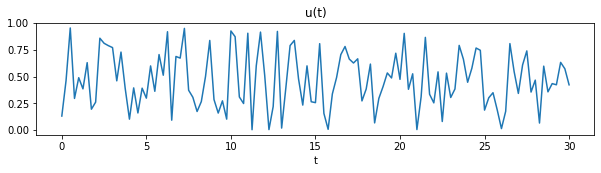

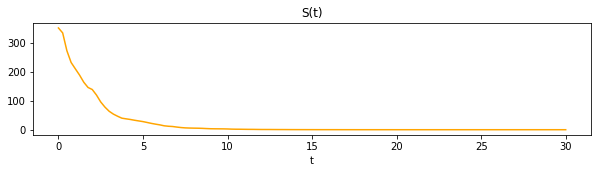

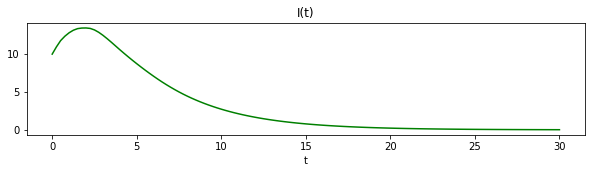

In [23]:
idx=np.random.randint(0,N)

x=load_data['train_X'][M*idx][:M]
y=load_data['train_Y'][M*idx:M*idx+M]

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 1)  
plt.plot(D, x)
plt.xlabel('t')
plt.title('u(t)')

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 2)  
plt.plot(D, y[:,0],'orange')
plt.title('S(t)')
plt.xlabel('t')

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 3)  
plt.plot(D, y[:,1],'g')
plt.title('I(t)')
plt.xlabel('t')

#plt.legend()

Text(0.5, 0, 't')

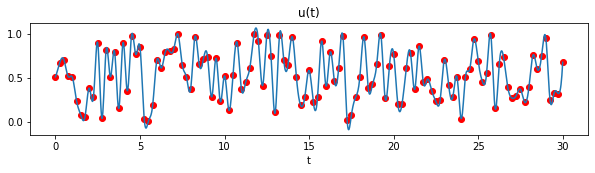

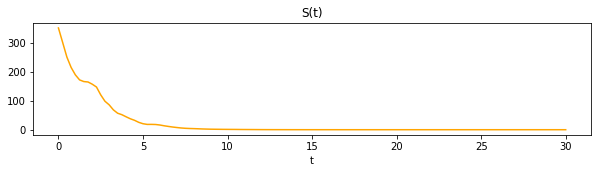

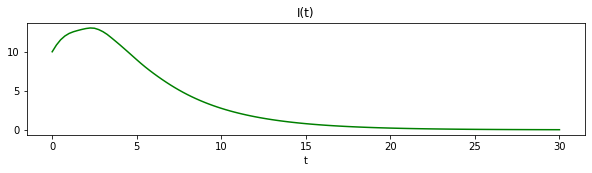

In [25]:
x = np.random.rand(M)
u = interp1d(D, x, kind='cubic')
sol = solve_ivp(func, (0,T), x0, method='RK45',t_eval=D,args=(u,))

xnew = np.linspace(0, T, 10*M) # for viz
ynew = u(xnew) # for viz

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 1)  
plt.plot(D, x, 'ro')
plt.plot(xnew, ynew)
plt.xlabel('t')
plt.title('u(t)')

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 2)  
plt.plot(D, sol.y[0],'orange')
plt.title('S(t)')
plt.xlabel('t')

plt.figure(figsize=(10,7))
plt.subplot(3, 1, 3)  
plt.plot(D, sol.y[1],'g')
plt.title('I(t)')
plt.xlabel('t')

In [29]:
args = torch.load(os.path.join("../../hyperdeeponet_code/results/diff_d2w20d2w20_b10_tanh_deeponet_1", 'args.bin'))

In [34]:
args

Namespace(a_hyper='tanh', a_target='tanh', batch=10000, d_hyper=2, d_in=1, d_out=1, d_target=2, data='diff', epochs=25000, gamma=0.0005, gpu_idx=0, load_path=None, lr=0.001, model='deeponet', multgpu=False, n_basis=10, n_sensor=100, name='diff_d2w20d2w20_b10_tanh_deeponet_1', sche_type='inversetime', seed=1, step_size=1, w_hyper=20, w_target=20, wd=0.0)